Demonstrating how neural networks learn to approximate a function through linear combinations of it's activation function.


In [3]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
from module.NN_tools import *

# define function to fit
func = lambda x: x**2.0 + 3*x
x, y, scale_x, scale_y = data_setup(func)

# design the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')

checkpoint_filepath = './model_checkpoints/exp_{epoch:1d}.hdf5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='max',
    save_best_only=False)
# ft the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10, verbose=0, callbacks=[model_checkpoint_callback])


In [12]:
def plot_model_predict(x, model, epoch):
    # make predictions for the input data
    # inverse transforms
    # plot x vs yhat
    yhat = model.predict(x)
    x_plot = scale_x.inverse_transform(x)
    yhat_plot = scale_y.inverse_transform(yhat)
    pyplot.scatter(x_plot,yhat_plot, marker = '.', label='Predicted at epoch' + epoch)
    

def plot_original(x,y):
    x_plot = scale_x.inverse_transform(x)
    y_plot = scale_y.inverse_transform(y)
    # plot x vs y
    pyplot.scatter(x_plot,y_plot, marker = '.', label='Actual')

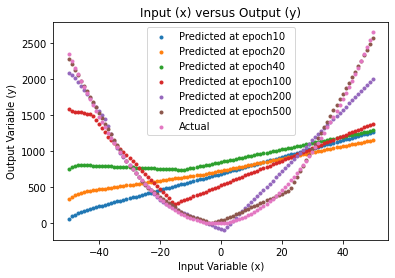

In [13]:
epochs = [10, 20, 40, 100, 200, 500]
from keras.models import load_model

for i in epochs:
    model = load_model('./model_checkpoints/exp_' + str(i) +'.hdf5')
    plot_model_predict(x, model, str(i))

plot_original(x,y)

pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

Dissecting model into it's weights, biases, and activation function


In [ ]:
import numpy as np
def single_input_to_layer(inp: int, weights):
    return [weights[i]*inp for i in range(len(weights))]

def relu(x):
    return max(0.0, x)

In [ ]:
def inner_layer(prev_layer, layer):
    w = layer.get_weights()[0]
    b = layer.get_weights()[1]
    out = np.zeros(len(b))
    for i in range(len(prev_layer)):
        out += single_input_to_layer(prev_layer[i], w[i])
    out += b
    return [relu(i) for i in out]

In [ ]:
def nn(model, inpt):
    prev_layer = inpt.copy()
    for layer in model.layers:
        prev_layer = inner_layer(prev_layer, layer)
    return prev_layer[0]
    

-50 50 0.0 2500.0


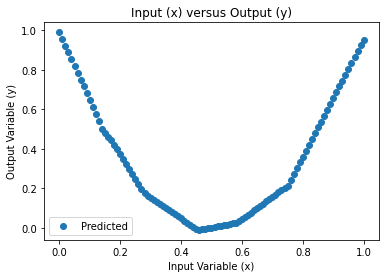

In [ ]:
x = asarray([i for i in range(-50,51)])
y = asarray([i**2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
yhat = model.predict(x)
pyplot.scatter(x,yhat, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()